# **Import library**

In [ ]:
pip install tpot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=d1a46f8cb335ab74640226936f5dcf4bc03c05dae32402a2475bdce6dc25ab9e
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
import random
import pandas as pd
import numpy as np

import tensorflow as tf

from deap import base, creator, tools, algorithms
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt

# **Upload and Read Dataset**

In [ ]:
dataset = pd.read_csv("/content/SKILICARSLAN_Anemia_DataSet.csv")
# dataset = pd.read_csv("/content/sample_data/SKILICARSLAN_Anemia_DataSet.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **Preprocessing**

In [ ]:
dataset.head()

,GENDER,WBC,NE#,LY#,MO#,EO#,BA#,RBC,HGB,HCT,...,SDTSD,TSD,FERRITTE,FOLATE,B12,All_Class,HGB_Anemia_Class,Iron_anemia_Class,Folate_anemia_class,B12_Anemia_class
0,1,10.63,6.31,2.79,0.91,0.56,0.06,4.31,12.7,37.6,...,248.90,40.176778,194.00,5.06,178.2,4,0,0,0,1
1,1,5.08,2.50,1.87,0.43,0.26,0.02,4.34,12.8,36.9,...,348.48,33.482553,57.37,9.88,197.7,4,0,0,0,1
2,1,13.68,9.40,2.69,1.55,0.03,0.01,3.18,9.4,27.5,...,357.27,20.144429,114.20,8.37,143.0,4,0,0,0,1
3,1,5.60,3.94,0.83,0.54,0.26,0.03,3.35,10.5,31.4,...,360.60,27.731559,214.20,6.39,139.9,4,0,0,0,1
4,1,3.57,2.03,1.25,0.10,0.18,0.01,1.31,5.1,14.3,...,223.28,78.860623,303.40,4.30,50.0,4,0,0,0,1


In [ ]:
#Display the summarry of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15300 entries, 0 to 15299
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GENDER               15300 non-null  int64  
 1   WBC                  15300 non-null  float64
 2   NE#                  15300 non-null  float64
 3   LY#                  15300 non-null  float64
 4   MO#                  15300 non-null  float64
 5   EO#                  15300 non-null  float64
 6   BA#                  15300 non-null  float64
 7   RBC                  15300 non-null  float64
 8   HGB                  15300 non-null  float64
 9   HCT                  15300 non-null  float64
 10  MCV                  15300 non-null  float64
 11  MCH                  15300 non-null  float64
 12  MCHC                 15300 non-null  float64
 13  RDW                  15300 non-null  float64
 14  PLT                  15300 non-null  float64
 15  MPV                  15300 non-null 

In [ ]:
#Examine the dataset for null values
dataset.isnull().sum()

GENDER                 0
WBC                    0
NE#                    0
LY#                    0
MO#                    0
EO#                    0
BA#                    0
RBC                    0
HGB                    0
HCT                    0
MCV                    0
MCH                    0
MCHC                   0
RDW                    0
PLT                    0
MPV                    0
PCT                    0
PDW                    0
SD                     0
SDTSD                  0
TSD                    0
FERRITTE               0
FOLATE                 0
B12                    0
All_Class              0
HGB_Anemia_Class       0
Iron_anemia_Class      0
Folate_anemia_class    0
B12_Anemia_class       0
dtype: int64

In [ ]:
#Removing unwanted columns
dataset=dataset.drop(['All_Class','HGB_Anemia_Class','Folate_anemia_class', 'B12_Anemia_class'], axis=1)

#view count
for x in dataset.select_dtypes(include ='int64'):
  print (dataset[x].value_counts(),"\n")

# Shuffle the data
dataset = dataset.sample(frac=1, random_state=42)


GENDER
0    10379
1     4921
Name: count, dtype: int64 

Iron_anemia_Class
0    11118
1     4182
Name: count, dtype: int64 



In [ ]:
dataset.shape

(15300, 25)

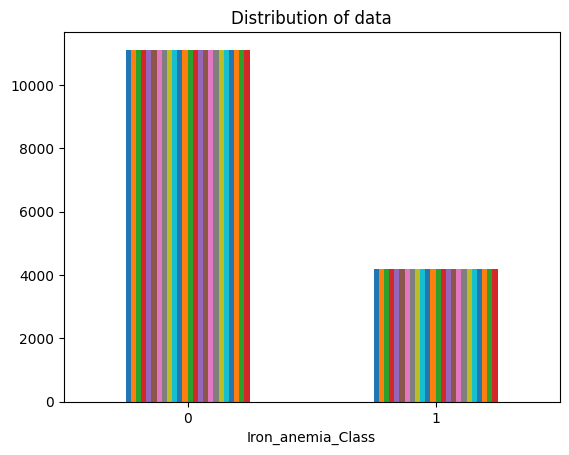

In [ ]:
# Iron Anemia:
ax = dataset.groupby('Iron_anemia_Class').count().plot(kind='bar', title='Distribution of data',legend=False)
ax = ax.set_xticklabels(['0','1'], rotation=0)

In [ ]:
# Split data to Features: x ,Label: y
x = dataset.drop("Iron_anemia_Class", axis=1)
y = dataset["Iron_anemia_Class"]

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Apply SVM ML**


In [ ]:
# Create SVM model
svm_model = SVC()

# Train the model with the best hyperparameters on the entire training set
svm_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [ ]:
print(f'accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print("Confusion matrix:\n", conf_matrix)

accuracy: 0.83
Precision: 0.82
Recall: 0.48
F1 Score: 0.61
Confusion matrix:
 [[2129   89]
 [ 435  407]]


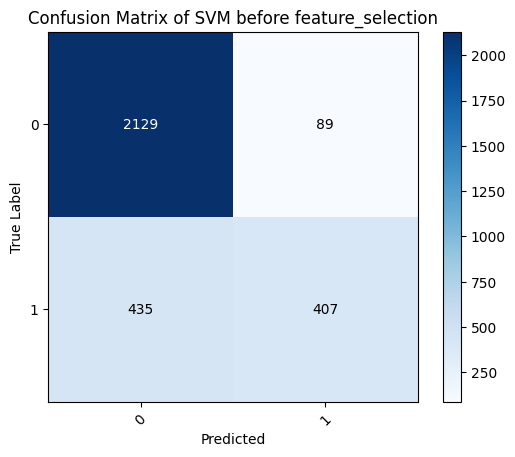

In [ ]:
class_names = ['0', '1']

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVM before feature_selection')
plt.colorbar()

# Add labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

# **Feature Selection using GA**

In [ ]:
columnName=x.columns.values.tolist()

In [ ]:
# Define the fitness function for feature selection
def evaluate_feature_selection(individual):
    selected_columns = [columnName[i] for i in range(len(individual)) if individual[i] == 1]
    X = dataset[selected_columns]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    model = SVC()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Genetic Algorithm parameters for feature selection
population_size_fs = 10
chromosome_length_fs = len(columnName)
mutation_rate_fs = 0.01
num_generations_fs = 10

# Create the creator and toolbox for feature selection
creator.create("FitnessMaxFS", base.Fitness, weights=(1.0,))
creator.create("IndividualFS", list, fitness=creator.FitnessMaxFS)
toolbox_fs = base.Toolbox()
toolbox_fs.register("attr_bool", random.randint, 0, 1)
toolbox_fs.register("individual", tools.initRepeat, creator.IndividualFS, toolbox_fs.attr_bool, n=chromosome_length_fs)
toolbox_fs.register("population", tools.initRepeat, list, toolbox_fs.individual)
toolbox_fs.register("mate", tools.cxTwoPoint)
toolbox_fs.register("mutate", tools.mutFlipBit, indpb=mutation_rate_fs)
toolbox_fs.register("select", tools.selTournament, tournsize=3)
toolbox_fs.register("evaluate", evaluate_feature_selection)

# Perform feature selection Genetic Algorithm optimization
population_fs = toolbox_fs.population(n=population_size_fs)
for gen_fs in range(num_generations_fs):
    offspring_fs = algorithms.varAnd(population_fs, toolbox_fs, cxpb=0.5, mutpb=0.2)
    fits_fs = toolbox_fs.map(toolbox_fs.evaluate, offspring_fs)
    for fit_fs, ind_fs in zip(fits_fs, offspring_fs):
        ind_fs.fitness.values = fit_fs
    population_fs = toolbox_fs.select(offspring_fs, k=len(population_fs))

# Select the best individual from the final population of feature selection GA
best_individual_fs = tools.selBest(population_fs, k=1)[0]
selected_features = [columnName[i] for i in range(len(best_individual_fs)) if best_individual_fs[i] == 1]

print("Selected Features:", selected_features)

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMaxFS' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'IndividualFS' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Selected Features: ['WBC', 'LY#', 'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'SD', 'TSD']


# **Apply SVM using best features**

In [ ]:
# Convert selected_features list to indices
selected_feature_indices = [columnName.index(feature) for feature in selected_features]

# Create X_train and X_test with selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Train SVM model using selected features
svm_model_selected = SVC()
svm_model_selected.fit(X_train_selected, y_train)

# Evaluate the model on the test set
accuracy_selected = svm_model_selected.score(X_test_selected, y_test)

print("Accuracy after feature selection:", accuracy_selected)

Accuracy after feature selection: 0.9117647058823529


In [ ]:
y_pred_selected = svm_model_selected.predict(X_test_selected)

# Calculate confusion matrix
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

# Print the results
print(f'Accuracy: {accuracy_selected:.2f}')
print(f'Precision: {precision_selected:.2f}')
print(f'Recall: {recall_selected:.2f}')
print(f'F1-score: {f1_selected:.2f}')
print("Confusion Matrix:",conf_matrix_selected)

Accuracy: 0.91
Precision: 0.89
Recall: 0.78
F1-score: 0.83
Confusion Matrix: [[2133   85]
 [ 185  657]]


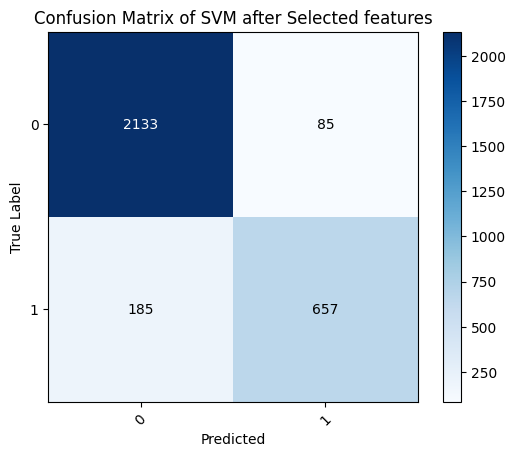

In [ ]:
class_names = ['0', '1']

# Plot the confusion matrix
plt.imshow(conf_matrix_selected, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVM after Selected features')
plt.colorbar()

# Add labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix_selected[i, j]), ha='center', va='center', color='white' if conf_matrix_selected[i, j] > conf_matrix_selected.max() / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

# **HyperPrameters Using GA**

In [ ]:
# Define the fitness function for hyperparameter tuning
def evaluate_hyperparameters(individual):
    C_param, gamma_param = individual
    if gamma_param < 0:
        gamma_param = 0.0
    model = SVC(C=C_param, gamma=gamma_param)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Genetic Algorithm parameters for hyperparameter tuning
population_size_hp = 10
num_hyperparameters = 2  # Assuming you want to optimize two hyperparameters (C and gamma)
hyperparameter_ranges = [(0.01, 0.1, 1, 10), (1, 0.1, 0.001, 0.0001)]  # Range for C and gamma respectively
# hyperparameter_ranges = [(0.1, 10), (0.001, 0.1)]
mutation_rate_hp = 0.01
num_generations_hp = 10

# Create the toolbox for hyperparameter tuning
creator.create("FitnessMaxHP", base.Fitness, weights=(1.0,))
creator.create("IndividualHP", list, fitness=creator.FitnessMaxHP)
toolbox_hp = base.Toolbox()
toolbox_hp.register("attr_float_C", random.uniform, hyperparameter_ranges[0][0], hyperparameter_ranges[0][1])
toolbox_hp.register("attr_float_gamma", random.uniform, hyperparameter_ranges[1][0], hyperparameter_ranges[1][1])
toolbox_hp.register("individual", tools.initCycle, creator.IndividualHP, (toolbox_hp.attr_float_C, toolbox_hp.attr_float_gamma), n=1)
toolbox_hp.register("population", tools.initRepeat, list, toolbox_hp.individual, n=population_size_hp)
toolbox_hp.register("mate", tools.cxTwoPoint)
toolbox_hp.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=mutation_rate_hp)
toolbox_hp.register("select", tools.selTournament, tournsize=3)
toolbox_hp.register("evaluate", evaluate_hyperparameters)

# Perform hyperparameter tuning using Genetic Algorithm
population_hp = toolbox_hp.population()
for gen_hp in range(num_generations_hp):
    offspring_hp = algorithms.varAnd(population_hp, toolbox_hp, cxpb=0.5, mutpb=0.2)
    fits_hp = toolbox_hp.map(toolbox_hp.evaluate, offspring_hp)
    for fit_hp, ind_hp in zip(fits_hp, offspring_hp):
        ind_hp.fitness.values = fit_hp
    population_hp = toolbox_hp.select(offspring_hp, k=len(population_hp))

# Select the best individual from the final population of hyperparameter tuning
best_individual_hp = tools.selBest(population_hp, k=1)[0]
best_hyperparameters = (best_individual_hp[0], best_individual_hp[1])

print("Best Hyperparameters (C, gamma):",best_hyperparameters)

Best Hyperparameters (C, gamma): (0.03139987122356984, 0.6738233783135306)


In [ ]:
# # Define the hyperparameter space for SVM
# hyperparameter_space = {
#     'C': np.logspace(-3, 3, 7),  # Regularization parameter
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel function
#     'gamma': ['scale', 'auto'],  # Kernel coefficient (for 'rbf', 'poly', and 'sigmoid' kernels)
# }

# # Define the fitness function
# def evaluate_svm(individual):
#     svm_params = {
#         'C': individual[0],
#         'kernel': individual[1],
#     }
#     if svm_params['kernel'] in ['rbf', 'poly', 'sigmoid']:
#         svm_params['gamma'] = individual[2]

#     svm_model = SVC(**svm_params)

#     # Evaluate the model using cross-validation
#     cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
#     mean_cv_score = np.mean(cv_scores)

#     return mean_cv_score,

# # Genetic Algorithm parameters
# population_size = 10
# num_generations = 10
# mutation_prob = 0.2
# crossover_prob = 0.8

# # Create the creator
# creator.create("FitnessMax", base.Fitness, weights=(1.0,))
# creator.create("Individual", list, fitness=creator.FitnessMax)

# # Create the toolbox
# toolbox = base.Toolbox()
# toolbox.register("attr_float", np.random.choice, hyperparameter_space['C'])
# toolbox.register("attr_kernel", np.random.choice, hyperparameter_space['kernel'])
# toolbox.register("attr_gamma", np.random.choice, hyperparameter_space['gamma'])
# toolbox.register("individual", tools.initCycle, creator.Individual,
#                  (toolbox.attr_float, toolbox.attr_kernel, toolbox.attr_gamma), n=1)
# toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# # Register genetic operators
# toolbox.register("mate", tools.cxTwoPoint)
# toolbox.register("mutate", tools.mutUniformInt, low=0, up=len(hyperparameter_space)-1, indpb=0.1)
# toolbox.register("select", tools.selTournament, tournsize=3)
# toolbox.register("evaluate", evaluate_svm)

# # Create initial population
# population = toolbox.population(n=population_size)

# # Perform the Genetic Algorithm optimization
# for gen in range(num_generations):
#     offspring = algorithms.varAnd(population, toolbox, cxpb=crossover_prob, mutpb=mutation_prob)
#     fits = toolbox.map(toolbox.evaluate, offspring)
#     for fit, ind in zip(fits, offspring):
#         ind.fitness.values = fit
#     population = toolbox.select(offspring, k=len(population))

# # Select the best individual from the final population
# best_individual = tools.selBest(population, k=1)[0]
# best_params = {
#     'C': hyperparameter_space['C'][best_individual[0]],
#     'kernel': hyperparameter_space['kernel'][best_individual[1]],
# }
# if best_params['kernel'] in ['rbf', 'poly', 'sigmoid']:
#     best_params['gamma'] = hyperparameter_space['gamma'][best_individual[2]]

# print("Best SVM hyperparameters:", best_params)

# **Apply SVM with best parameters**


In [ ]:
# Convert best_hyperparameters tuple to a dictionary
best_hyperparameters_dict = {'C': best_hyperparameters[0], 'gamma': best_hyperparameters[1]}

# Create SVM model with best hyperparameters
best_svm_model = SVC(**best_hyperparameters_dict)

# Train the model with the best hyperparameters on the entire training set
best_svm_model.fit(X_train, y_train)

# Predict labels for the test set
y_pred = best_svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print(f'accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print("Confusion matrix:\n", conf_matrix)

accuracy: 0.72
Precision: 0.00
Recall: 0.00
F1 Score: 0.00
Confusion matrix:
 [[2218    0]
 [ 842    0]]


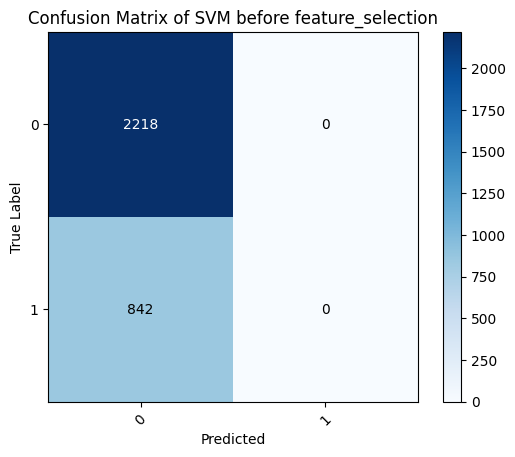

In [ ]:
class_names = ['0', '1']

# Plot the confusion matrix
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVM before feature_selection')
plt.colorbar()

# Add labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()

# **Feature Selection using GA and best paramaters**

In [ ]:
columnName=x.columns.values.tolist()

In [ ]:
# Define the fitness function for feature selection
def evaluate_feature_selection(individual):
    selected_columns = [columnName[i] for i in range(len(individual)) if individual[i] == 1]
    X = dataset[selected_columns]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
    model = SVC(**best_hyperparameters_dict)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy,

# Genetic Algorithm parameters for feature selection
population_size_fs = 10
chromosome_length_fs = len(columnName)
mutation_rate_fs = 0.01
num_generations_fs = 10

# Create the creator and toolbox for feature selection
creator.create("FitnessMaxFS", base.Fitness, weights=(1.0,))
creator.create("IndividualFS", list, fitness=creator.FitnessMaxFS)
toolbox_fs = base.Toolbox()
toolbox_fs.register("attr_bool", random.randint, 0, 1)
toolbox_fs.register("individual", tools.initRepeat, creator.IndividualFS, toolbox_fs.attr_bool, n=chromosome_length_fs)
toolbox_fs.register("population", tools.initRepeat, list, toolbox_fs.individual)
toolbox_fs.register("mate", tools.cxTwoPoint)
toolbox_fs.register("mutate", tools.mutFlipBit, indpb=mutation_rate_fs)
toolbox_fs.register("select", tools.selTournament, tournsize=3)
toolbox_fs.register("evaluate", evaluate_feature_selection)

# Perform feature selection Genetic Algorithm optimization
population_fs = toolbox_fs.population(n=population_size_fs)
for gen_fs in range(num_generations_fs):
    offspring_fs = algorithms.varAnd(population_fs, toolbox_fs, cxpb=0.5, mutpb=0.2)
    fits_fs = toolbox_fs.map(toolbox_fs.evaluate, offspring_fs)
    for fit_fs, ind_fs in zip(fits_fs, offspring_fs):
        ind_fs.fitness.values = fit_fs
    population_fs = toolbox_fs.select(offspring_fs, k=len(population_fs))

# Select the best individual from the final population of feature selection GA
best_individual_fs = tools.selBest(population_fs, k=1)[0]
selected_features = [columnName[i] for i in range(len(best_individual_fs)) if best_individual_fs[i] == 1]

print("Selected Features:", selected_features)

Selected Features: ['GENDER', 'NE#', 'MO#', 'RBC', 'MCV', 'MCHC', 'MPV', 'PDW', 'SD', 'SDTSD', 'FERRITTE']


# **Apply SVM with best parameters and features**

In [ ]:
# Convert selected_features list to indices
selected_feature_indices = [columnName.index(feature) for feature in selected_features]

# Create X_train and X_test with selected features
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Train SVM model using selected features
svm_model_selected = SVC()
svm_model_selected.fit(X_train_selected, y_train)

# Evaluate the model on the test set
accuracy_selected = svm_model_selected.score(X_test_selected, y_test)

print("Accuracy after feature selection:", accuracy_selected)

Accuracy after feature selection: 0.8111111111111111


In [ ]:
y_pred_selected = svm_model_selected.predict(X_test_selected)

# Calculate confusion matrix
conf_matrix_selected = confusion_matrix(y_test, y_pred_selected)
accuracy_selected = accuracy_score(y_test, y_pred_selected)
precision_selected = precision_score(y_test, y_pred_selected)
recall_selected = recall_score(y_test, y_pred_selected)
f1_selected = f1_score(y_test, y_pred_selected)

# Print the results
print(f'Accuracy: {accuracy_selected:.2f}')
print(f'Precision: {precision_selected:.2f}')
print(f'Recall: {recall_selected:.2f}')
print(f'F1-score: {f1_selected:.2f}')
print("Confusion Matrix:",conf_matrix_selected)

Accuracy: 0.81
Precision: 0.75
Recall: 0.47
F1-score: 0.58
Confusion Matrix: [[2088  130]
 [ 448  394]]


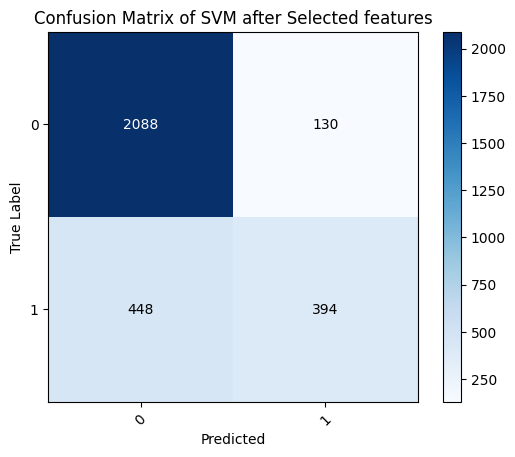

In [ ]:
class_names = ['0', '1']

# Plot the confusion matrix
plt.imshow(conf_matrix_selected, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix of SVM after Selected features')
plt.colorbar()

# Add labels
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add text annotations
for i in range(len(class_names)):
    for j in range(len(class_names)):
        plt.text(j, i, str(conf_matrix_selected[i, j]), ha='center', va='center', color='white' if conf_matrix_selected[i, j] > conf_matrix_selected.max() / 2 else 'black')

plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.show()